In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [76]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [77]:
df = df.drop(columns=['User ID','Gender'])

In [78]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [80]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

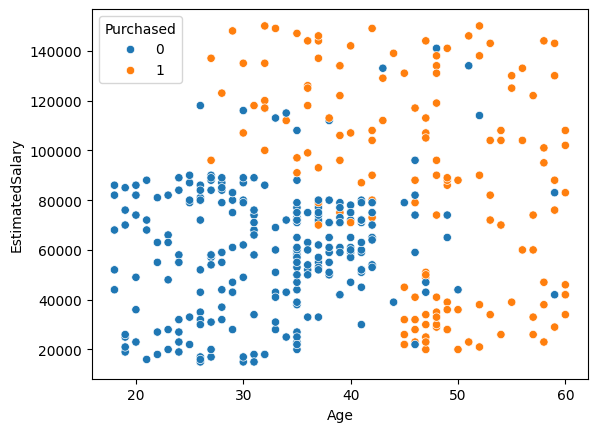

In [81]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=df,hue="Purchased")

In [82]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [85]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [86]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

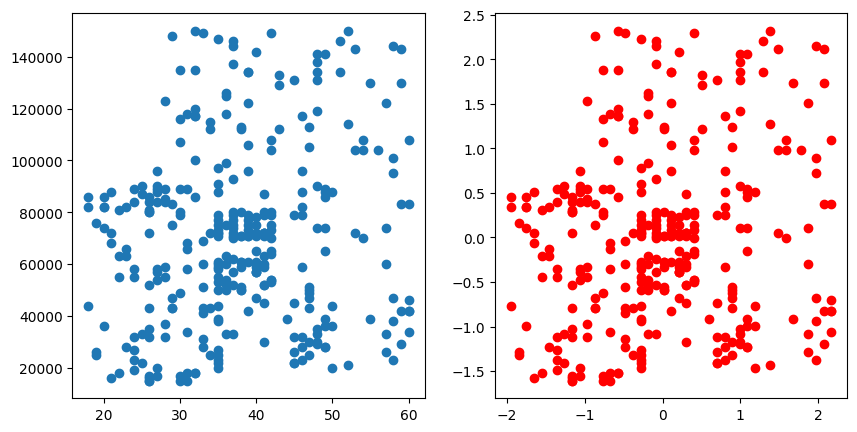

In [94]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(10,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')

In [88]:
x_train

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [89]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)

y_pred = lr.predict(x_test_scaled)

In [90]:
print(accuracy_score(y_test,y_pred)*100)

86.25


In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [92]:
print(confusion_matrix(y_test,y_pred))

[[50  2]
 [ 9 19]]


In [93]:
cross_val_score(lr,x_train_scaled,y_train,cv=5,scoring="accuracy").mean()*100

np.float64(82.1875)

In [95]:
import pickle

In [96]:
pickle.dump(lr,open('lr_model2','wb'))